
<p align ="left"><font size="5">Image Compression using Wavelets</font></p>

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
from google.colab.patches import cv2_imshow

In [ ]:
print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [ ]:
wavelet  = pywt.Wavelet('db1')
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [ ]:
def img_compression(image, n, w,):
  s = os.stat("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Wavelet Images/original Image/flower.png").st_size
  print("Original Image\n" + "Size in Bytes: " + str(s) )
  cv2_imshow(image)

  # 2-D Wavelet decomposition in pywavelets package.
  coeffs = pywt.wavedec2(image, wavelet = w, level = n)

  """ pywt.coeffs_to_array - Arranges the wavelet coefficient list from "wavedec2" to a single array.
      Returns : coefficient array and coefficient slices.
      coefficient slices -   List of slices corresponding to each coefficient
      That is a slice of 1 would extract the first level
              detail coefficients from `coeff_arr`
  """
  coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
  Csort = np.sort(np.abs(coeff_arr.reshape(-1)))
  #print(len(Csort)) 52441
  """
      Order the wavelet coefficient from biggest to smallest.
      Define these thresholds to chop off the other coefficients and only keep only the first 0.9,0.5, 0.25,0.1,0.08 percent
      of the wavelet coeff respectively.

  """
  size = []
  compressed_img = []
  for keep in (0.08,0.1,0.20,0.5,0.9):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr)>thresh
    Cfilt = coeff_arr*ind
    coeffs_filt = pywt.array_to_coeffs(Cfilt, coeff_slices, output_format="wavedec2")
    Arecon = pywt.waverec2(coeffs_filt, wavelet =w)  # Reconstruct the original image
    cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Wavelet Images/flower"+str(keep)+".png", Arecon.astype("uint8"))
  for filename in glob.glob("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Wavelet Images/*.png"):
    size.append(os.stat(filename).st_size)
    n = cv2.imread(filename)
    compressed_img.append(n)

  plt.figure(figsize =(15,15))


  plt.subplot(3,3,1)
  compression_ratio = np.round(140169/size[0],2)
  plt.title(( "\n Threshold: 0.08\n" + "Size in Bytes: "+str(size[0])+"KB" + "\nCompression Ratio: " +str(compression_ratio) + ":1"))
  plt.imshow(compressed_img[0])

  plt.subplot(3,3,2)
  compression_ratio = np.round(140169/size[1],2)
  plt.imshow(compressed_img[1])
  plt.title(( "Threshold: 0.1\n" +"Size in Bytes: " + str(size[1])+"KB" + "\nCompression Ratio: " +str(compression_ratio)+ ":1"))

  plt.subplot(3,3,3)
  compression_ratio = np.round(140169/size[2],2)
  plt.title(("\n\nThreshold: 0.20\n" +"Size in Bytes: " +str(size[2])+"KB" + "\nCompression Ratio: " +str(compression_ratio)+ ":1"))
  plt.imshow(compressed_img[2])

  plt.subplot(3,3,4)
  compression_ratio = np.round(140169/size[3],2)
  plt.title(("\n\nThreshold: 0.5\n" +"Size in Bytes: " +str(size[3])+"KB" + "\nCompression Ratio: " +str(compression_ratio)+ ":1"))
  plt.imshow(compressed_img[3])

  plt.subplot(3,3,5)
  compression_ratio = np.round(140169/size[4],2)
  plt.title(("\n\nThreshold: 0.9\n" +"Size in Bytes: " +str(size[4])+"KB" + "\nCompression Ratio: " +str(compression_ratio)+ ":1"))
  plt.imshow(compressed_img[4])


  plt.subplot(3,3,6)
  plt.title("Original Image\n" + "Size in Bytes: 140169 KB")
  plt.imshow(image, cmap="gray")

  plt.tight_layout()
  plt.show()


Original Image
Size in Bytes: 140169


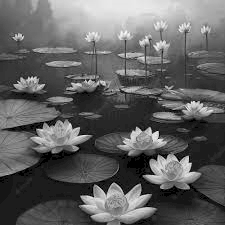

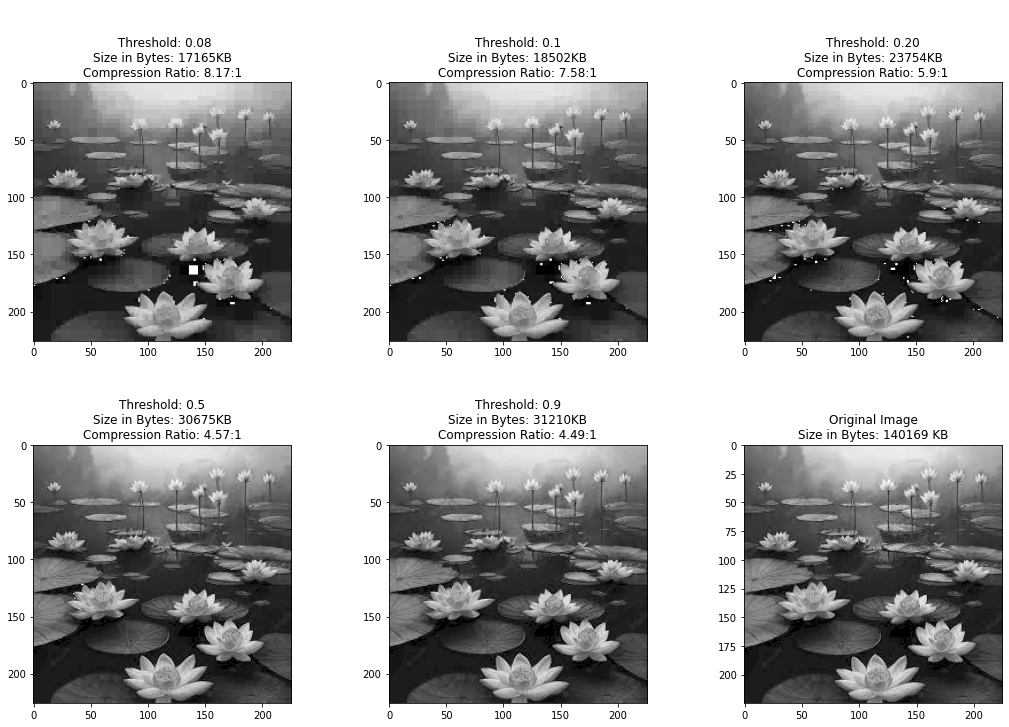

In [ ]:
image  = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Wavelet Images/original Image/flower.png",0)
# 4 layer decomposition - more layer- higher the compression
n = 4
# wavelet families - Dabauchi 1 wavelet family
w = "haar"
img_compression(image, n,w)